In [17]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import geojson

In [18]:
df_im = pd.read_csv('data/im.csv')
# df_im = df_im.loc[df_im['Time Period'] == 2019, :]
df_im['Area Name'] = df_im['Area Name'].str.upper()

In [19]:
with open('util/Op_tina.geojson', encoding='utf-8') as f:
    gj = geojson.load(f)

In [20]:
fig = go.Figure(data = go.Choropleth(
    geojson=gj,
    featureidkey='features.properties.opstina_imel',
    locations = df_im['Area Name'],
    z = df_im['Net Migrations per 1000 inhabitants'].astype(float),
))

fig.show()

In [22]:
import geoplot
import geoplot.crs as gcrs
import geopandas as gpd

In [35]:
data = gpd.read_file('util/Op_tina.geojson')

<GeoAxes: >

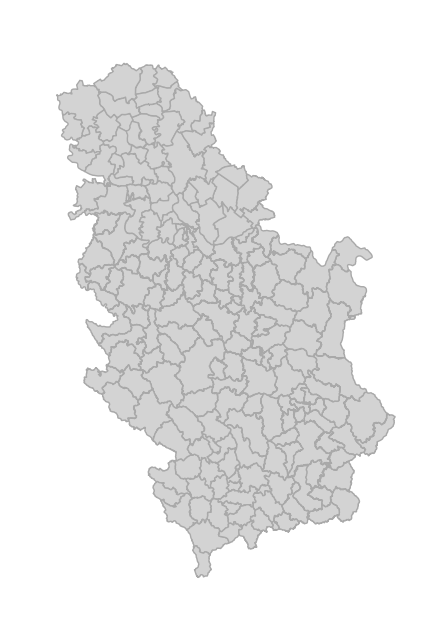

In [33]:
geoplot.polyplot(data, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=1,
    figsize=(12, 8))

In [15]:
fig = px.choropleth(data_frame=df_im, geojson=gj,
                    featureidkey='properties.opstina_imel',
                    animation_frame='Time Period',
                    locations='Area Name', 
                    color_continuous_scale='Inferno',
                    color='Net Migrations per 1000 inhabitants')
fig.update_geos(fitbounds = 'locations', visible=False)
fig.show()